<a href="https://colab.research.google.com/github/dtoralg/TheValley_MDS/blob/main/%5B02%5D%20-%20Analisis_Cluster/%5B01%5D%20-%20Notebooks/E2_Clustering_Jerarquico_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Jerárquico y Dendrogramas con el dataset Iris

## Introducción
En este ejercicio vamos a trabajar con técnicas de clustering jerárquico para descubrir patrones y grupos naturales en los datos, utilizando el clásico dataset Iris. Clustering jerárquico es un método que no requiere especificar el número de clusters a priori y permite visualizar las relaciones entre los datos mediante dendrogramas, facilitando la interpretación de la estructura de los grupos.

El dataset Iris es uno de los más utilizados en estadística y machine learning. Contiene 150 muestras de flores, cada una con medidas de sépalo y pétalo, y una etiqueta que indica la especie real de la flor. Sin embargo, en este ejercicio no usaremos las etiquetas para el clustering: el objetivo es comprobar si las técnicas de agrupamiento son capaces de recuperar la estructura natural de las especies a partir de las medidas.

## Objetivos del ejercicio
* Comprender los conceptos básicos del clustering jerárquico y cómo se construyen dendrogramas.

* Preprocesar los datos para asegurar que las variables tengan una escala comparable.

* Aplicar diferentes métodos de linkage para construir un dendrograma y analizar su interpretación.

* Asignar etiquetas de clusters a las muestras a partir del dendrograma.

* Evaluar si los clusters resultantes se corresponden con las especies reales del dataset Iris.

## Descripción del dataset
El dataset Iris contiene las siguientes características métricas para cada muestra de flor:

Sepal Length (cm): Longitud del sépalo

Sepal Width (cm): Ancho del sépalo

Petal Length (cm): Longitud del pétalo

Petal Width (cm): Ancho del pétalo

Las especies incluidas en el dataset son:

* Iris-setosa

* Iris-versicolor

* Iris-virginica

Este ejercicio te permitirá explorar la relación entre las medidas y comprobar si es posible diferenciar las especies sin necesidad de etiquetas, aplicando únicamente clustering jerárquico.

## Importar librerías necesarias


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")


## Cargar y explorar el dataset Iris


In [2]:
# Cargar el dataset Iris como DataFrame
iris_data = load_iris()
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df_iris['species'] = iris_data.target

print("Primeras 5 filas del dataset Iris:")
df_iris.head()


Primeras 5 filas del dataset Iris:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Estandarizar las variables numéricas


In [3]:
# Estandarizamos las variables numéricas para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_iris.iloc[:, :-1])

print("Muestra de las primeras 5 filas tras estandarizar:")
pd.DataFrame(X_scaled, columns=iris_data.feature_names).head()


Muestra de las primeras 5 filas tras estandarizar:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Calcular el linkage y construir el dendrograma


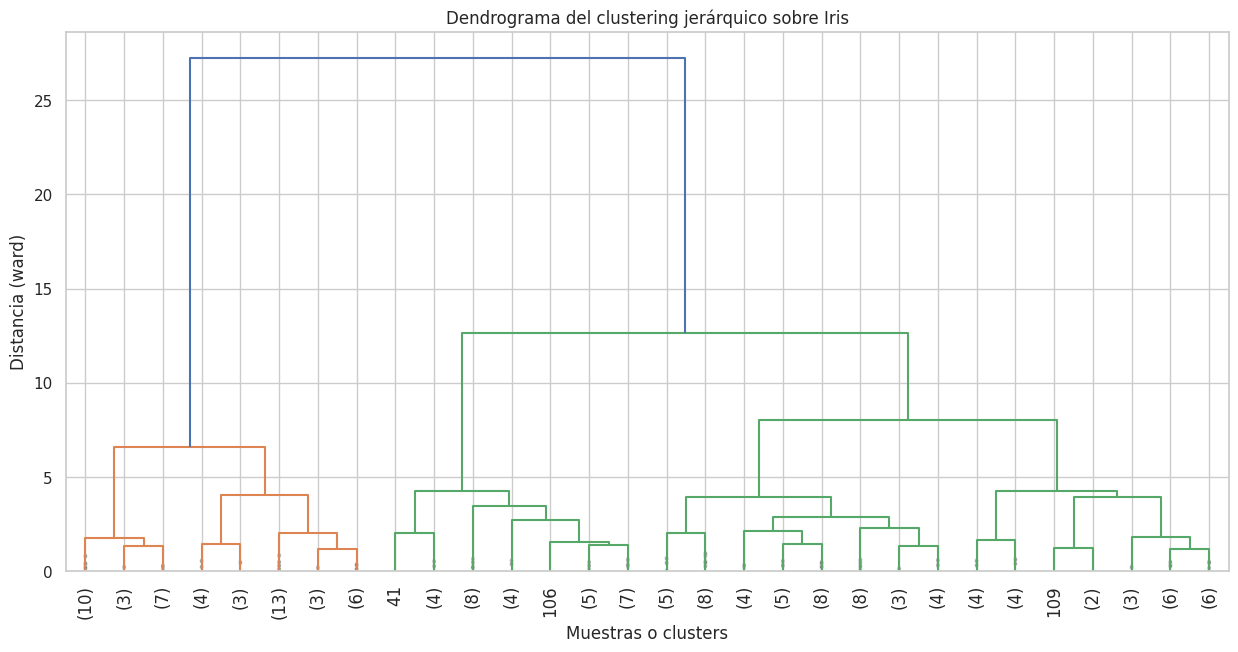

In [4]:
# Calculamos el linkage con el método 'ward' (minimiza la varianza interna de los clusters)
linkage_matrix = linkage(X_scaled, method='ward')

# Construimos el dendrograma
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix,
           truncate_mode='lastp',  # Truncar para que sea más fácil de leer
           p=30,                   # Mostrar solo los últimos 30 fusiones
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)
plt.title('Dendrograma del clustering jerárquico sobre Iris')
plt.xlabel('Muestras o clusters')
plt.ylabel('Distancia (ward)')
plt.show()


## Asignar etiquetas a partir del dendrograma


In [5]:
# Definimos un número de clusters cortando el dendrograma en un punto de distancia
num_clusters = 3  # por ejemplo, probamos con 3 clusters
labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Añadimos las etiquetas predichas al DataFrame
df_iris['cluster'] = labels

print("Primeras 5 filas con etiquetas de cluster asignadas:")
df_iris.head()


Primeras 5 filas con etiquetas de cluster asignadas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


## Visualizar los clusters resultantes


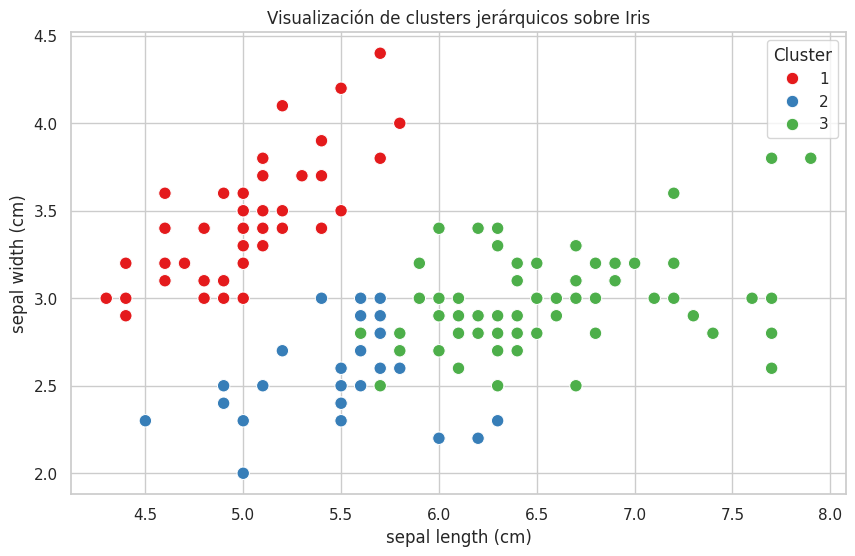

In [6]:
# Creamos un scatterplot usando las dos primeras características originales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_iris.iloc[:, 0], y=df_iris.iloc[:, 1],
                hue=df_iris['cluster'], palette='Set1', s=80)
plt.title('Visualización de clusters jerárquicos sobre Iris')
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.legend(title='Cluster')
plt.show()
